In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
a=pd.read_csv('C:/Users/Public/datascience assignment/Multi linear regression/toyo.csv')

In [3]:
a

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
a.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
a1=a.drop(['Id', 'Model','Mfg_Month', 'Mfg_Year','Fuel_Type','Met_Color','Color','Automatic', 'Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis=1)

In [6]:
a1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
a1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [8]:
a2=a1.rename({'Price':'pr','Age_08_04':'age','Doors':'dr','Gears':'gr','Quarterly_Tax':'qt','Weight':'wt'},axis=1)

In [9]:
a2

,pr,age,KM,HP,cc,dr,gr,qt,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
a2.corr()

,pr,age,KM,HP,cc,dr,gr,qt,wt
pr,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
dr,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gr,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
wt,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [11]:
a2.columns

Index(['pr', 'age', 'KM', 'HP', 'cc', 'dr', 'gr', 'qt', 'wt'], dtype='object')

In [12]:
model=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a2).fit()                                        

In [13]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# iteration 1

In [14]:
model_influence=model.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

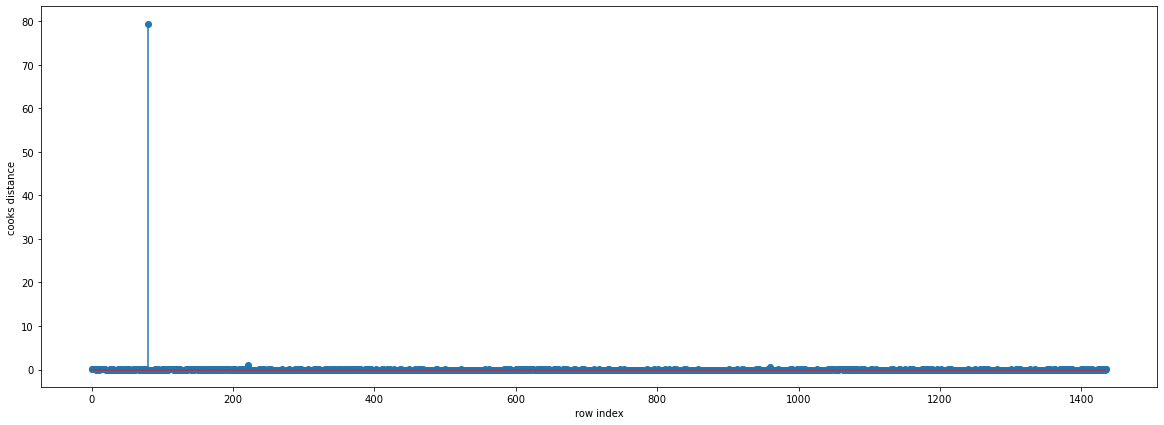

In [15]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a2)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [16]:
(np.argmax(c_V),np.max(c_V))

(80, 79.52010624138055)

In [17]:
a3=a2.drop([80],axis=0)

In [18]:
a4=a3.reset_index()

In [19]:
a5=a4.drop(['index'],axis=1)

In [20]:
model1=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a5).fit()

In [21]:
(model1.rsquared,model1.rsquared_adj)

(0.8693790488655819, 0.8686462525057815)

# iteration 2

In [22]:
model_influence=model1.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

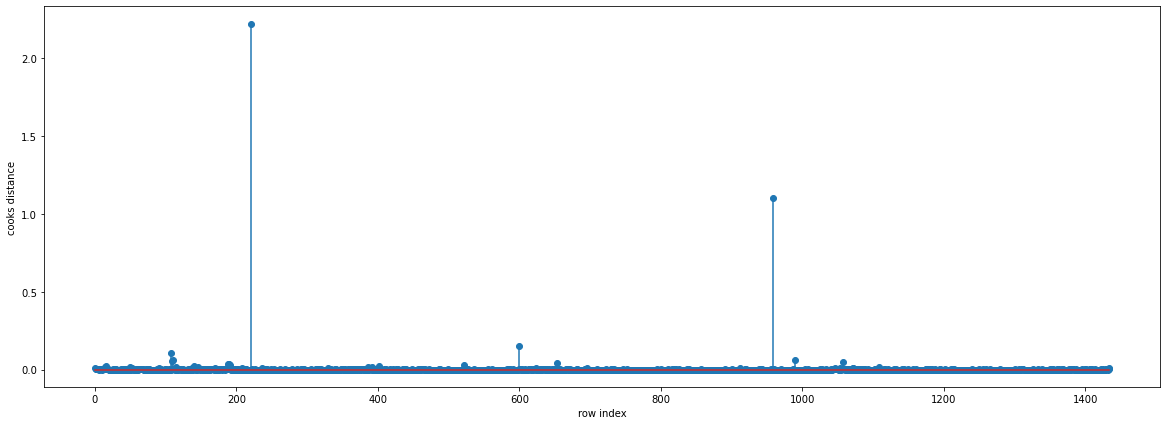

In [23]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a5)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [24]:
(np.argmax(c_V),np.max(c_V))

(220, 2.2244611713001508)

In [25]:
a6=a5.drop([220],axis=0)

In [26]:
a7=a6.reset_index()

In [27]:
a8=a7.drop(['index'],axis=1)

In [28]:
model2=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a8).fit()

In [29]:
(model2.rsquared,model2.rsquared_adj)

(0.8778445878599779, 0.877158803090069)

# iteration 3

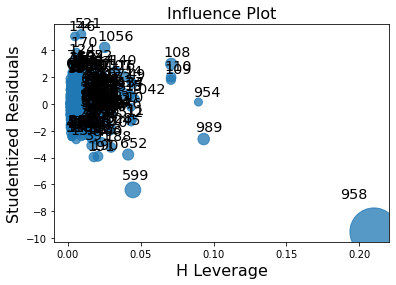

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [31]:
a9=a8.drop([958,599,989],axis=0)

In [32]:
a10=a9.reset_index()

In [33]:
a11=a10.drop(['index'],axis=1)

In [34]:
model3=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a11).fit()

In [35]:
(model3.rsquared,model3.rsquared_adj)

(0.8901104557274359, 0.889492230443202)

# iteration 4

In [36]:
model_influence=model3.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

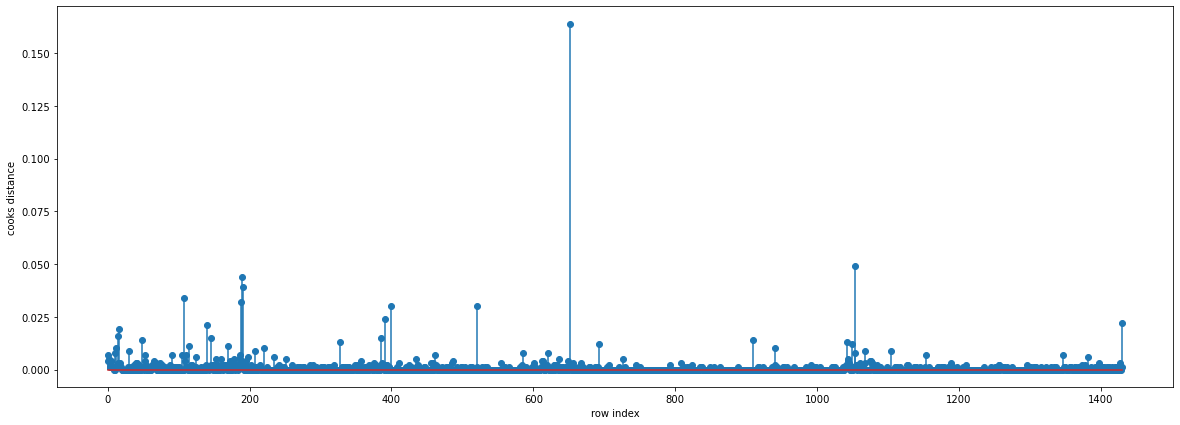

In [37]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a11)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [38]:
(np.argmax(c_V),np.max(c_V))

(651, 0.16445978623569876)

In [39]:
a12=a11.drop([651],axis=0)

In [40]:
a13=a12.reset_index()

In [41]:
a14=a13.drop(['index'],axis=1)

In [42]:
model4=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a14).fit()

In [43]:
(model4.rsquared,model4.rsquared_adj)

(0.8921467826162199, 0.8915395864592388)

# iteration 5

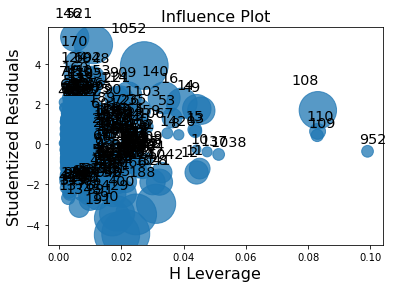

In [44]:
influence_plot(model4)
plt.show()

In [45]:
a15=a14.drop([108],axis=0)

In [46]:
a16=a15.reset_index()

In [47]:
a17=a16.drop(['index'],axis=1)

In [48]:
model5=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a17).fit()

In [49]:
(model5.rsquared,model5.rsquared_adj)

(0.8895720504830691, 0.8889499211900159)

# iteration 6

In [50]:
model_influence=model4.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

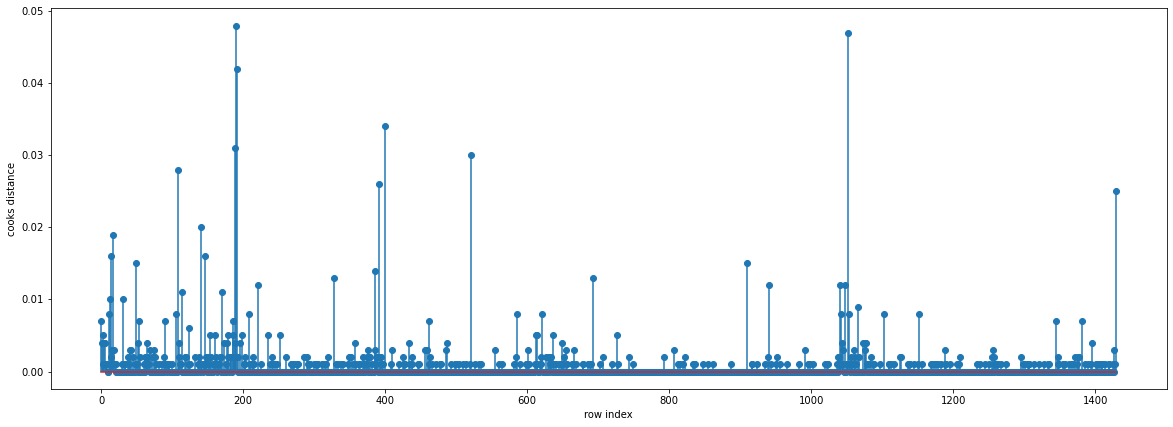

In [51]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a14)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [52]:
(np.argmax(c_V),np.max(c_V))

(190, 0.04778150490262708)

In [53]:
a18=a14.drop([190],axis=0)

In [54]:
a19=a18.reset_index()

In [55]:
a20=a19.drop(['index'],axis=1)

In [56]:
model6=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a20).fit()

In [57]:
(model6.rsquared,model6.rsquared_adj)

(0.8934037497368834, 0.8928032074818799)

# iteration 8

In [58]:
model_influence=model6.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

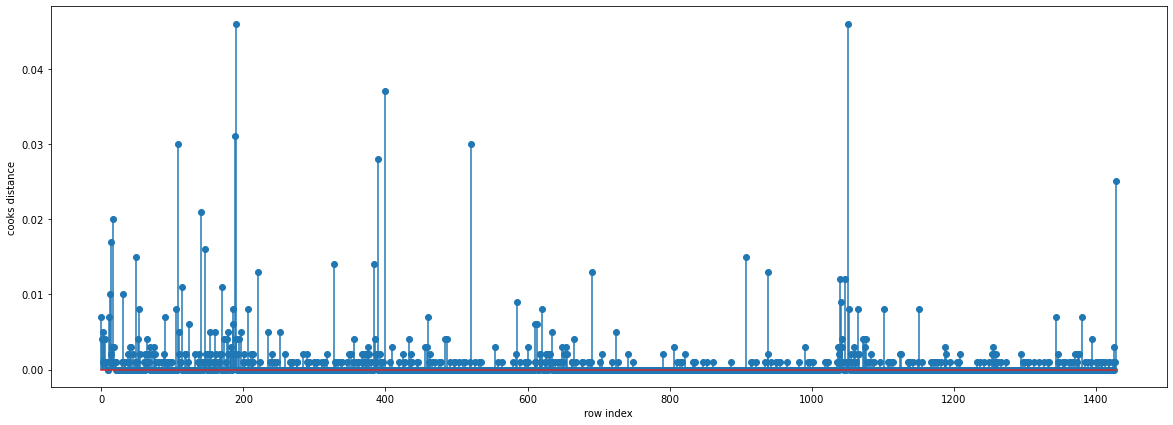

In [59]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a20)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [60]:
(np.argmax(c_V),np.max(c_V))

(1051, 0.04635289333469863)

In [61]:
a21=a20.drop([1051],axis=0)

In [62]:
a22=a21.reset_index()

In [63]:
a23=a22.drop(['index'],axis=1)

In [64]:
model7=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a23).fit()

In [65]:
(model7.rsquared,model7.rsquared_adj)

(0.8944954473640403, 0.8939006366374105)

# iteration 7

In [66]:
model_influence=model7.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

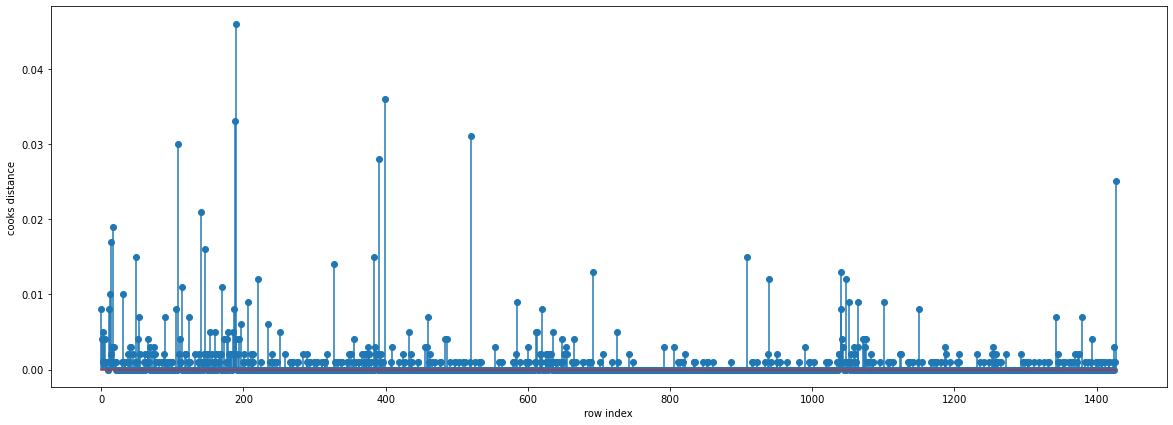

In [67]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a23)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [68]:
(np.argmax(c_V),np.max(c_V))

(190, 0.04568151299775316)

In [69]:
a24=a23.drop([190],axis=0)

In [70]:
a25=a24.reset_index()

In [71]:
a26=a25.drop(['index'],axis=1)

In [72]:
model8=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a26).fit()

In [73]:
(model8.rsquared,model8.rsquared_adj)

(0.8958333530393431, 0.8952456709690432)

# iteration 9

In [74]:
a27=a26**(1/2)

In [75]:
a27.head()

,pr,age,KM,HP,cc,dr,gr,qt,wt
0,116.189500,4.795832,216.762543,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
1,117.260394,4.795832,270.068510,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
2,118.110118,4.898979,204.232710,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
3,122.270193,5.099020,219.089023,9.486833,44.72136,1.732051,2.236068,14.491377,34.132096
4,117.260394,5.477226,196.214169,9.486833,44.72136,1.732051,2.236068,14.491377,34.205263


In [76]:
model9=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a27).fit()

In [77]:
model9.rsquared,model9.rsquared_adj

(0.8819747647183509, 0.8813088959720511)

In [78]:
# here squareroot transformation is not working ,hence we are again going to drop another entries from the dataset.

# iteration 10

In [79]:
model_influence=model8.get_influence()
(c_V,_)=model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

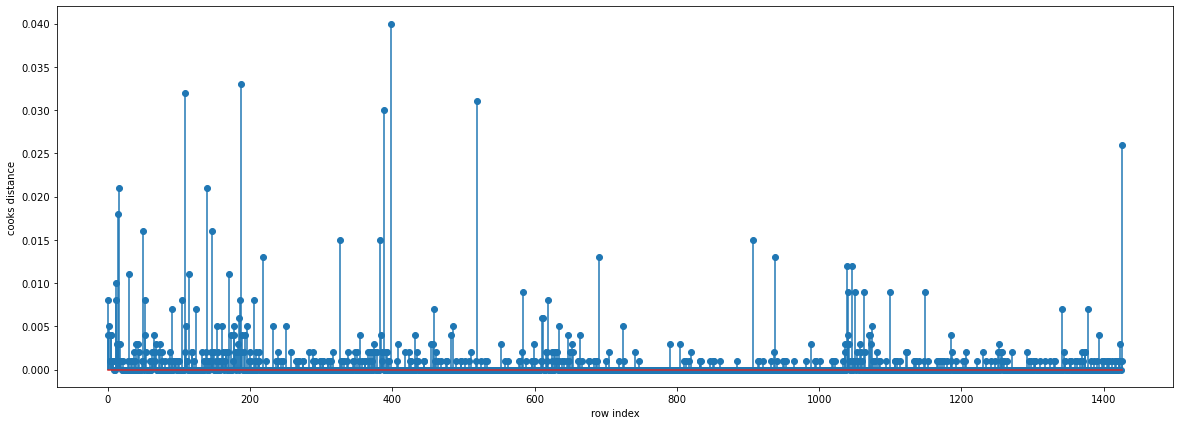

In [80]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a26)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [81]:
(np.argmax(c_V),np.max(c_V))

(398, 0.03973810074179249)

In [82]:
a28=a27.drop([398],axis=0)

In [83]:
a29=a28.reset_index()

In [84]:
a30=a29.drop(['index'],axis=1)

In [85]:
model10=smf.ols('pr~age+KM+HP+cc+dr+gr+qt+wt',data=a30).fit()

In [86]:
(model10.rsquared,model10.rsquared_adj)

(0.8829539036158249, 0.8822930929093511)

In [87]:
# here we can see that corresponding models accuracy is started decreasing over here.

In [88]:
df={'models':['basic model','model1','model2','model3','model4','model5','model6','model7','model8','model10'],'rsquared values':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared,model8.rsquared,model10.rsquared]}

In [89]:
b2=pd.DataFrame(df)
b2

,models,rsquared values
0,basic model,0.863763
1,model1,0.869379
2,model2,0.877845
3,model3,0.890110
4,model4,0.892147
5,model5,0.889572
6,model6,0.893404
7,model7,0.894495
8,model8,0.895833
9,model10,0.882954
